# importing the necessary library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data overview and exploratory data analysis

In [9]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Churn distribution')

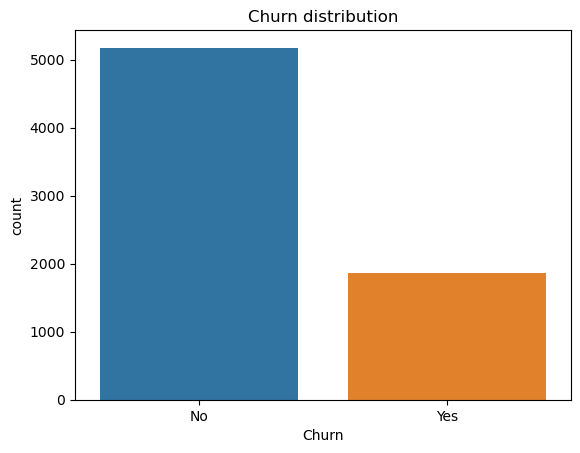

In [14]:
# to check if the target data distribution is balanced or unbalanced
sns.countplot(x ='Churn',data =df)
plt.title('Churn distribution')

In [15]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
#  therefore the data is imbalanced

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
categorical_col = ['SeniorCitizen','gender','Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'] 

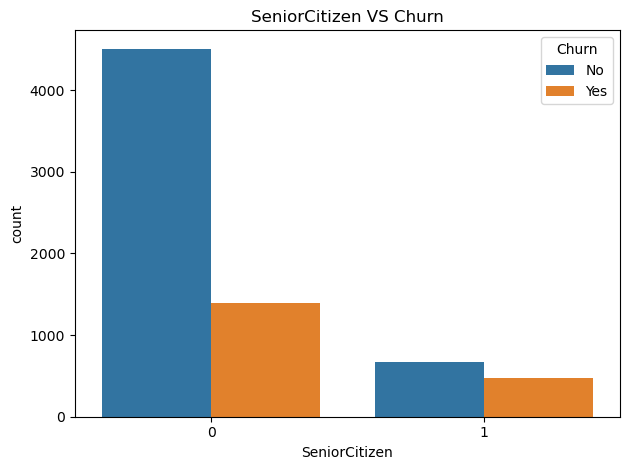

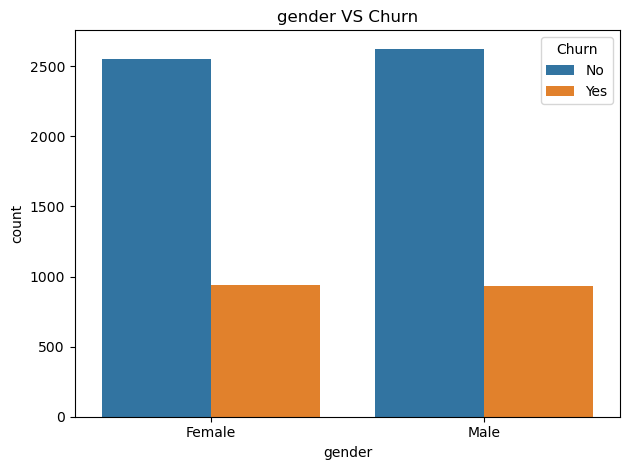

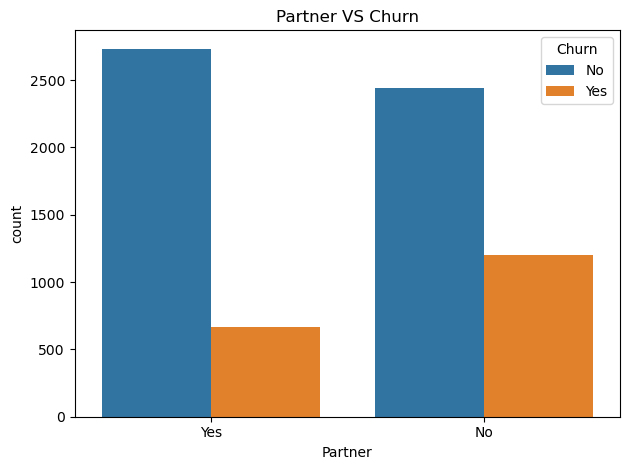

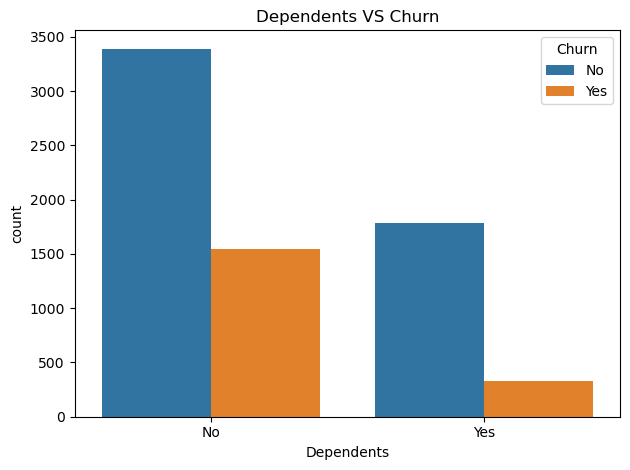

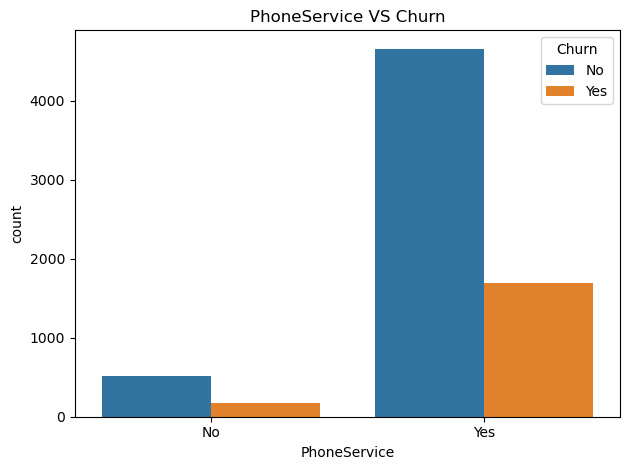

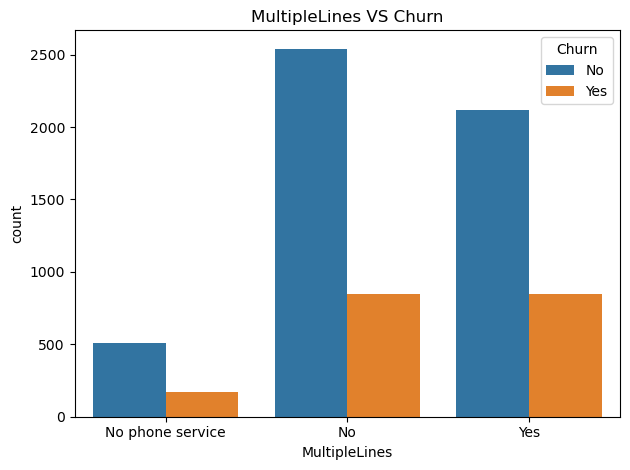

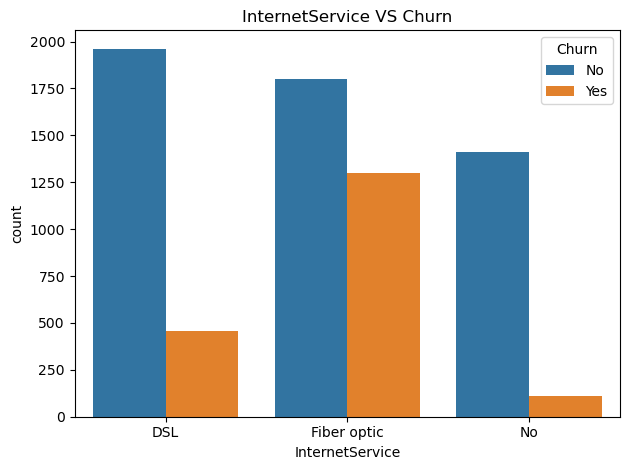

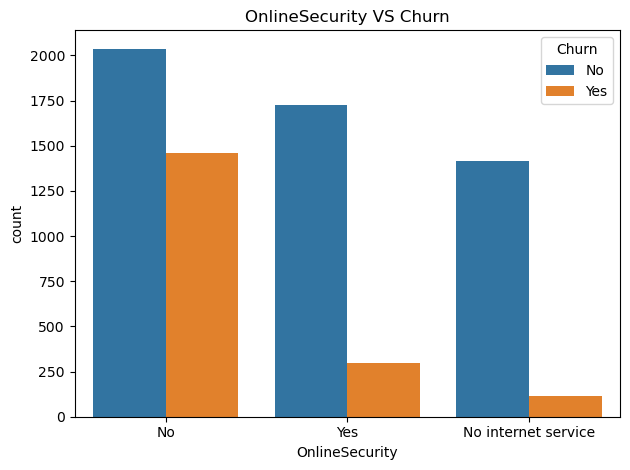

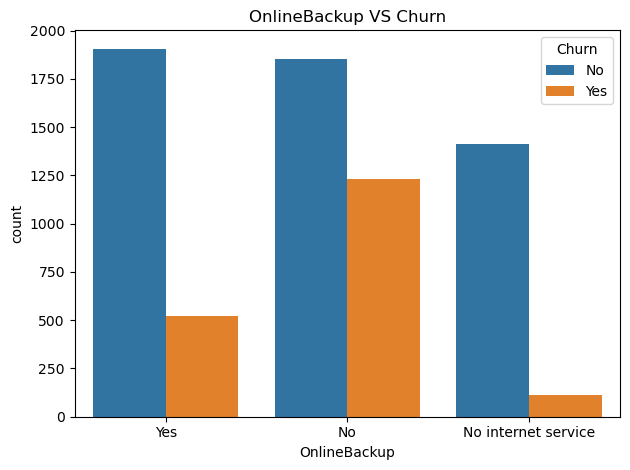

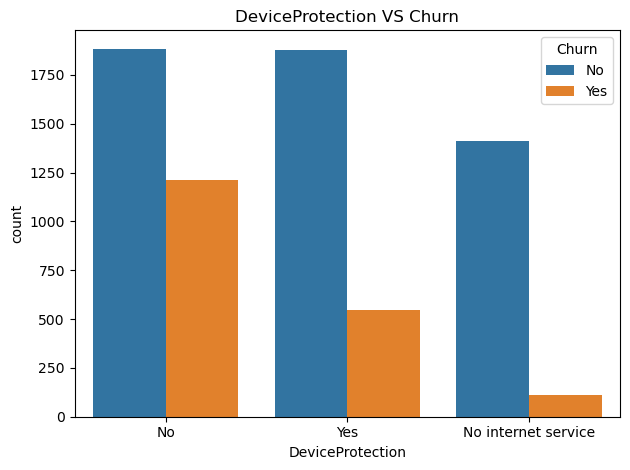

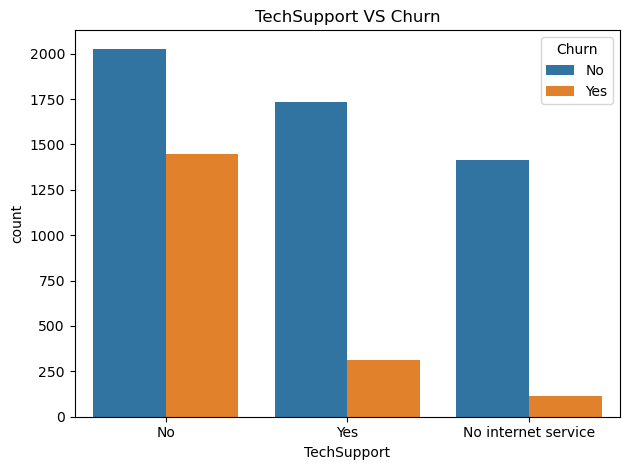

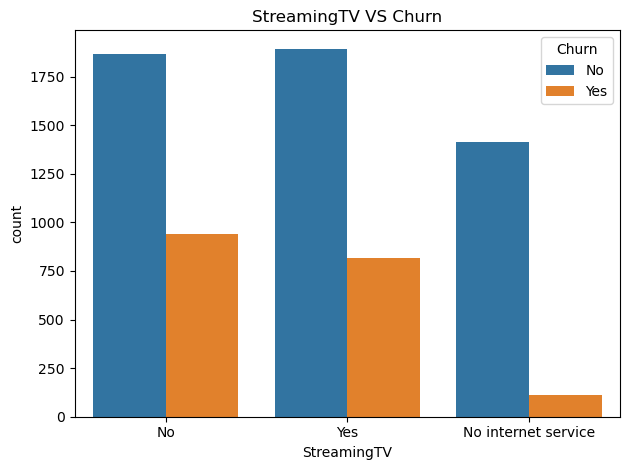

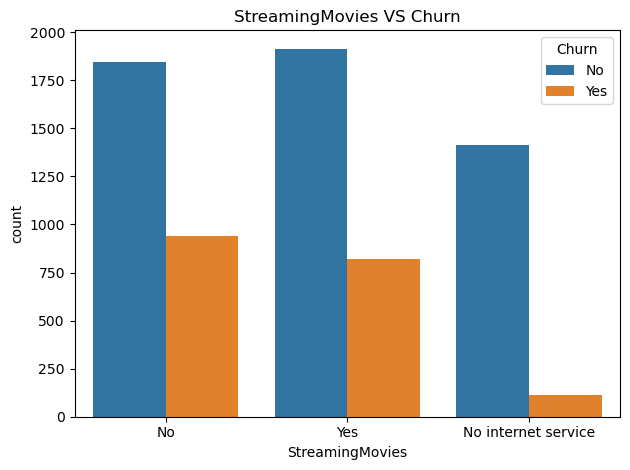

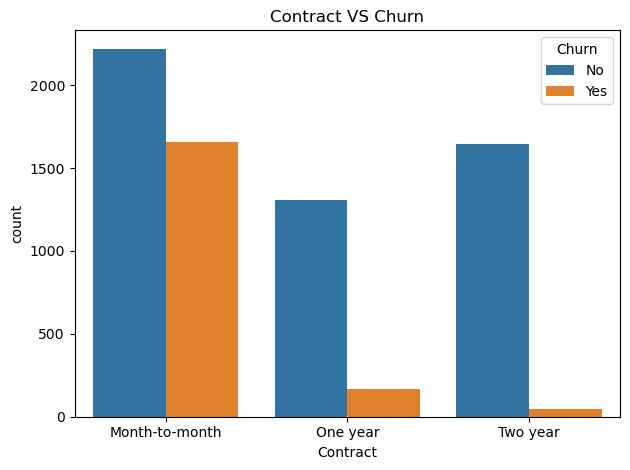

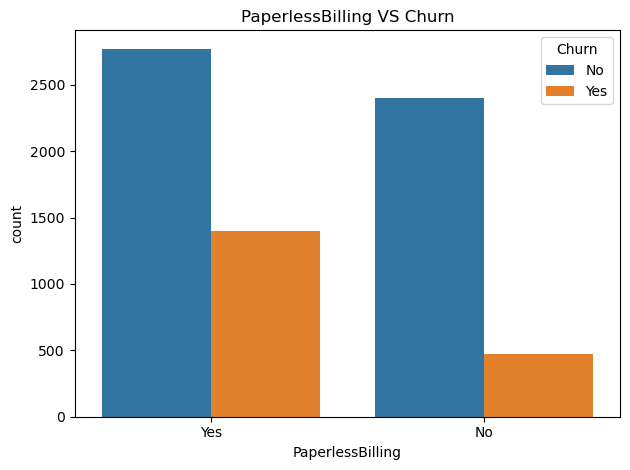

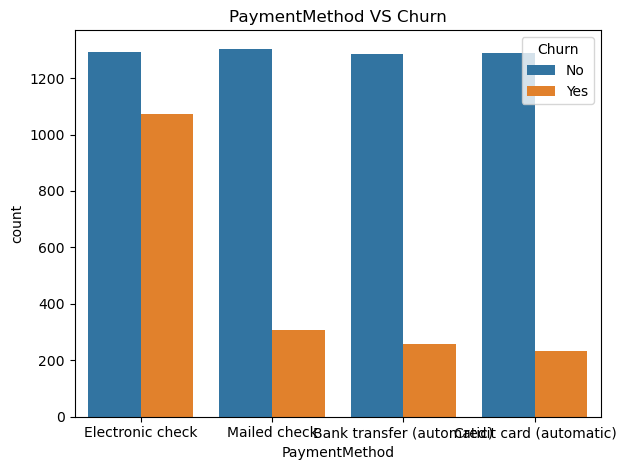

In [19]:
#visulaizing the categorical columns
for col in categorical_col:
    sns.countplot(x = col, data = df, hue = 'Churn')
    plt.title(f'{col} VS Churn')
    plt.tight_layout()
    plt.show()              

In [20]:
# visualising numerical columns

Text(0.5, 1.0, 'tenure vs Churn')

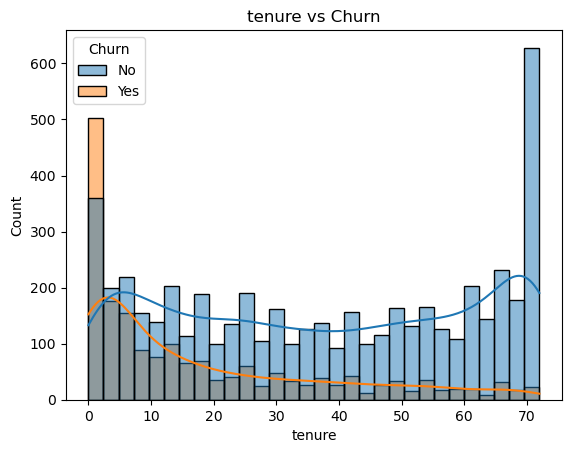

In [21]:
sns.histplot(x = 'tenure', data = df, hue = 'Churn', bins = 30, kde = True)
plt.title('tenure vs Churn')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

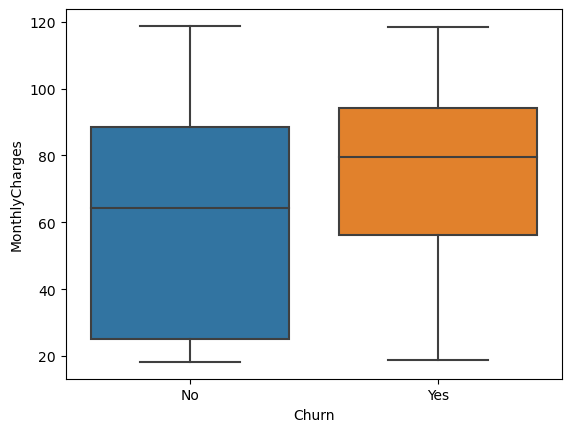

In [22]:
sns.boxplot(y = 'MonthlyCharges', data = df, x = 'Churn')

In [23]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

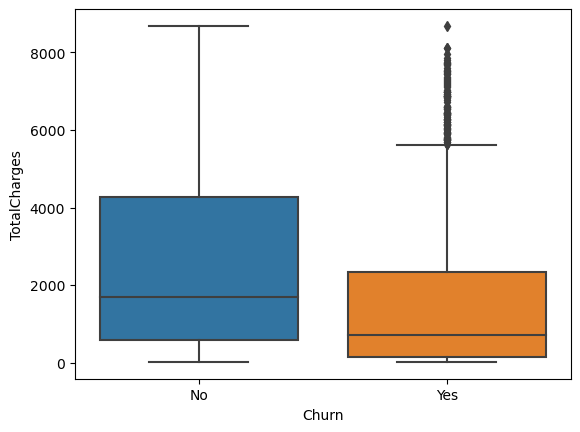

In [24]:
sns.boxplot(y='TotalCharges',data = df,x = 'Churn')

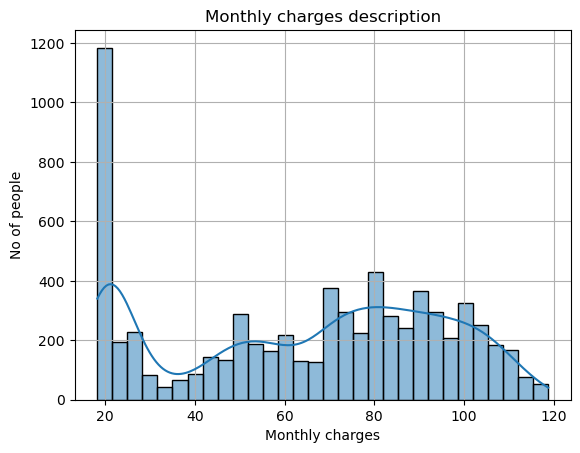

In [25]:
sns.histplot(df['MonthlyCharges'], bins = 30 , kde = True)
plt.title('Monthly charges description')
plt.xlabel('Monthly charges')
plt.ylabel('No of people')
plt.grid(True)

<Axes: >

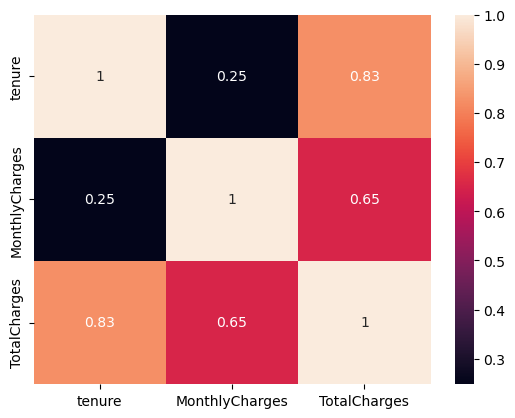

In [26]:
numerical_col = ['tenure','MonthlyCharges', 'TotalCharges']
sns.heatmap(df[numerical_col].corr(),annot = True)

In [27]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
df.dropna(subset = ['TotalCharges'],inplace = True)

In [29]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
#mapping the categorical columns

In [31]:
df['Churn']= df['Churn'].map({'Yes':1,'No':0})

In [32]:
df.drop('customerID',axis = 1, inplace = True)

In [33]:
df_encoded = pd.get_dummies(df, columns = categorical_col, drop_first= True )

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen_1',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [36]:
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,Churn,SeniorCitizen_1,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [37]:
X = df_encoded.drop('Churn',axis = 1)

In [38]:
y = df_encoded['Churn']

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [43]:
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dc = DecisionTreeClassifier(max_depth=4,random_state=42,class_weight= 'balanced')

In [46]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [47]:
prediction = dc.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

<Axes: >

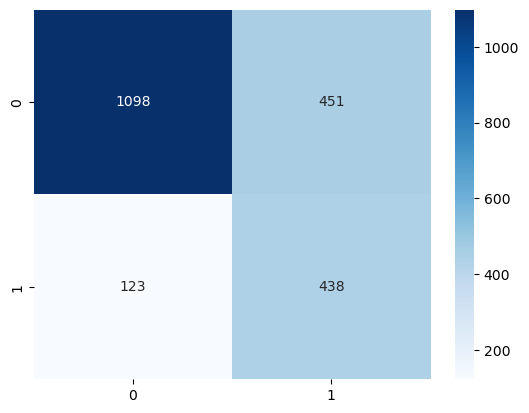

In [49]:
sns.heatmap(confusion_matrix(y_test,prediction), annot = True, fmt = 'd',cmap = 'Blues')

In [50]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1549
           1       0.49      0.78      0.60       561

    accuracy                           0.73      2110
   macro avg       0.70      0.74      0.70      2110
weighted avg       0.79      0.73      0.74      2110



# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier(n_estimators= 100, max_depth= 5, random_state=42)

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [54]:
y_pred = rf.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1549
           1       0.66      0.40      0.50       561

    accuracy                           0.79      2110
   macro avg       0.74      0.66      0.68      2110
weighted avg       0.77      0.79      0.77      2110



<Axes: >

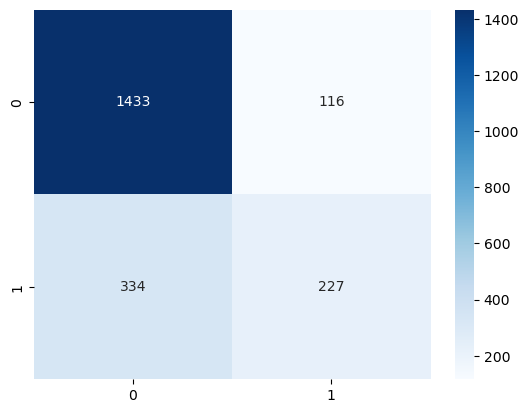

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd',cmap = 'Blues')

In [57]:
# feature importance

In [58]:
importance = rf.feature_importances_

In [59]:
imp = pd.Series(importance, index = X_train.columns).sort_values(ascending = False)

Text(0, 0.5, 'score')

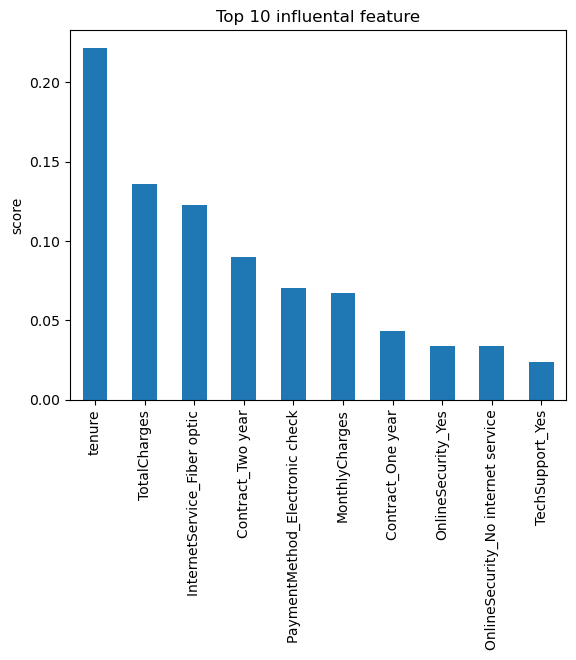

In [60]:
imp.head(10).plot(kind = 'bar')
plt.title('Top 10 influental feature')
plt.ylabel('score')